# Application of Probability in Machine Learning, Data Science & Image processing

In this project, I will demonstrate **3** use cases of **Application of Probability** in **Machine Learning**(which is my area of interest). **Machine learning** is an application of **Artificial Intelligence (AI)** that provides systems with the ability to automatically learn and improve from experience without being explicitly programmed. A computer program is said to learn from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance at tasks in **T**, as measured by **P**, improves with experience **E**. As we can see that in **Machine Learning** we make the computer to learn from the historical data and then predict on new data. While predicting we can’t predict what gonna happen exactly instead, we predict the **Probability**. We can infer that **Probability** is heavily used in **Machine Learning**.


# Use case 1

Now I am demonstrating the **first** use-case which is the application of **Probability** in **Text Mining/Text Analysis**. In Text Analysis, we have **Text Classification**, which I am  demonstrating below. Text Classification is a process of classifying data which is present in the form of text such as tweets, reviews, articles, blogs, etc. into predefined categories. **Sentiment Analysis** is a special case of Text Classification where users’ opinion or sentiments about any product are predicted from textual data. Sentiment Analysis(Opinion mining) is the process of determining whether a piece of writing is positive, negative or neutral. A sentiment analysis system for text analysis combines Natural Language Processing (NLP) & Machine Learning techniques to assign weighted sentiment scores to the entities, topics, themes and categories within a sentence or phrase. Sentiment analysis helps data analysts within large enterprises gauge public opinion, conduct nuanced market research, monitor brand and product reputation, and understand customer experiences. The ML model which I will use for Sentiment Analysis is **Naive Bayes** which is an extended form of **Bayes Theorem**.

I go through the brief overview of constructing a classifier from the **Probability model**, then move to **Data preprocessing**, **Training** & **Hyperparameters optimization**. I will write script in **Python**.

Let's start!!!

# Naive Bayes

**Naive Bayes** classification algorithm tends to be a baseline solution for sentiment analysis task. The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes. Let’s have a brief look at maths.

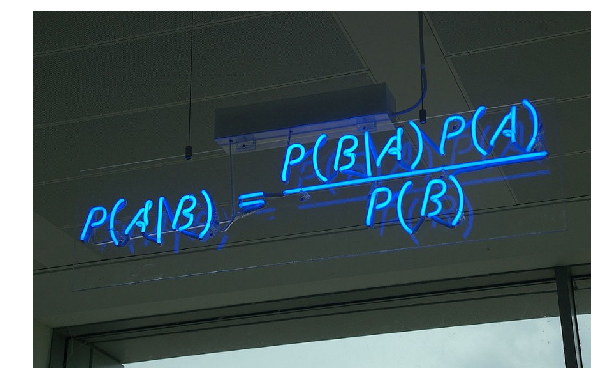

Given the dependent feature vector **(x₁, …, xn)** and the class **Ck**. **Bayes’** theorem is stated mathematically as the following relationship:

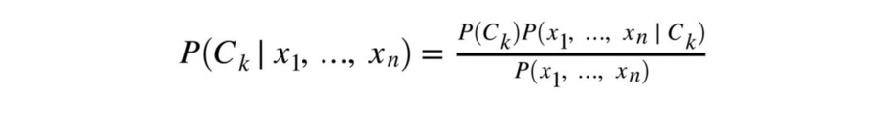

According to the *naive* conditional independence assumptions, for the given class **Ck** each feature of vector **xi** is conditionally independent of every other feature **xj** for **i≠j**.

Thus, the relation can be simplified to:

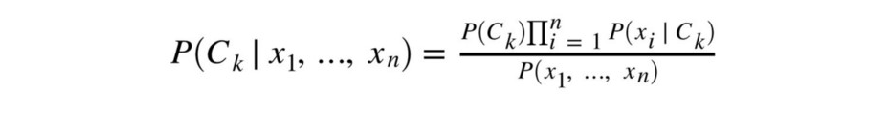

Since **P(x₁, …, xn)** is constant, if the values of the feature variables are known, the following classification rule can be used:


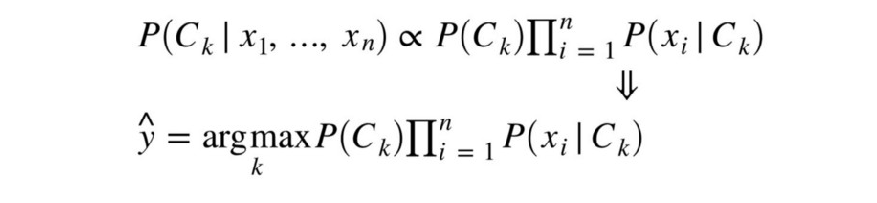

To avoid underflow, log probabilities can be used.


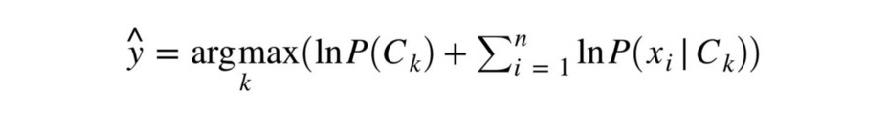

The variety of naive Bayes classifiers primarily differs between each other by the assumptions they make regarding the distribution of **P(xi|Ck)**, while **P(Ck)** is usually defined as the relative frequency of class **Ck** in the training dataset.

The multinomial distribution is parametrized by vector **θk=(θk1,…,θkn)** for each class **Ck**, where n is the number of features (i.e. the size of the vocabulary) and **θki** is the probability **P(xi|Ck)** of feature i appearing in a sample that belongs to the class **Ck**.

The parameters **θk** is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

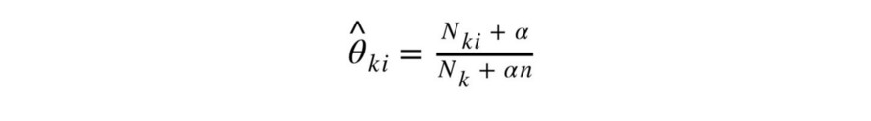

where **Nki** is the number of times feature i appears in a sample of class **k** in the training set **T**, and **Ny** is the total count of all features for class **Ck**. The smoothing priors **α ≥ 0**  accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting **α = 1** is called **Laplace smoothing**, while  **α < 1** is called **Lidstone smoothing**.

## Importing the libraries

In [1]:
#For doing mathematical operation
import numpy as np

#For importing the dataset
import pandas as pd

#For plotting the data
import matplotlib.pyplot as plt

#For converting text into a Document Term Matrix(DTM)
from sklearn.feature_extraction.text import CountVectorizer

#For tokenizing the DTM
from nltk.tokenize import RegexpTokenizer

#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split

## Loading the data
Dataset can be downloaded from [here](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)

In [9]:
dataset = pd.read_csv('dataset/train.csv', delimiter=',')

## Have a look at the dataset

In [10]:
dataset.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

## Getting the summary of the data

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## Preprocessing data
Texts generated by humans in social media sites contain lots of noise that can significantly affect the results of the sentiment classification process. Moreover, depending on the features generation approach, every new term seems to add at least one new dimension to the feature space. That makes the feature space more sparse and high-dimensional. Consequently, the task of the classifier has become more complex.

To prepare messages, such text preprocessing techniques as replacing URLs and usernames with keywords, removing punctuation marks and converting to lowercase were used in this program.
To proceed further with the sentiment analysis we need to do text classification. We can use *Bag of words (BOW)* model for the analysis. In laymen terms, *BOW* model converts text in the form of numbers which can then be used in an algorithm for analysis.

Specifically, *BOW* model is used for feature extraction in text data. It returns a vector with all the words and the number of times each word is repeated. It is known as *BOW* because it is only concerned with the number of times a word is repeated rather than the order of words. Let’s take an example to understand it better (assume each document contains a sentence only):

**Doc1: Switzerland is a beautiful country.**

**Doc2: India is a country of smart IT professionals.**

**Doc3: USA is a country of opportunities.**

The table below is known as the *Document term matrix (DTM)*.

**Doc 1 Vector -> 1 1 1 1 1 0 0 0 0 0 0 0**

**Doc 2 Vector -> 0 1 1 0 1 1 1 1 1 1 0 0**

**Doc 3 Vector -> 0 1 1 0 1 0 1 0 0 0 1 1**

**Cumulative -> 1 3 3 1 3 1 2 1 1 1 1 1**


The model shown above is a monogram model. If two words are taken at a time (for ex: Switzerland is, is a, a beautiful, beautiful country, … ) then it is known as the **Bi-gram model** similarly for *N-words* at a time it will be **N-gram model**. A higher gram model tends to work better than the **monogram model**.

More the content in each document lengthier would be the length of each vector (will contain a lot of zeros). Doc vectors would be a sparse vector if documents are too large. Sparse vectors need a lot of memory for storage and due to length, even computation becomes slow. To reduce the length of the sparse vectors, one may use the technique like **stemming**, **lemmatization**, converting to lower case or ignoring stop-words etc.

Now, we will generate *DTM* using *CountVectorizer* module of **Scikit-Learn**. To read more about the arguments of CountVectorizer you may visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). As discussed above we will use:

 - tokenizer = Overrides the string tokenization step, we generate tokenizer from NLTK’s Regex tokenizer (by default: None)
 - lowercase = True (no need to use, as it is set True by default)
 - stop_words = ‘english’ (by default None is used, to improve the result we can provide a custom made list of stop words)
 - ngram_range = (1,1) (by default its (1,1) i.e strictly monograms will be used, (2,2) only bigrams while (1,2) uses both)

## Generating the DTM 

In [12]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])

## Splitting the datset
We will now split the data for training and testing to check how well our model has performed. Also, we will randomize the data in case our data includes all the positive first and then all negative or some other kind of bias. We will use: scikit_learn’s [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for splitting the text_count (which contains our X) and dataset[‘Sentiment’] (this contains Y).

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dataset['Sentiment'], test_size=0.2, random_state=5)

Now we have the training and testing data. We should start the analysis. Our analysis will be in 5 steps:
 - Defining the model
 - Compiling the model
 - Fitting the model
 - Evaluating the model
 - Making predictions with the model

## Defining the model

Naive Bayes Model works particularly well with text classification and spam filtering. Advantages of working with NB algorithm are:
 - Requires a small amount of training data to learn the parameters
 - Can be trained relatively fast compared to sophisticated models

The main disadvantage of NB Algorithm is:
 - It is a decent classifier but a bad estimator
 - It works well with discrete values but won’t work with continuous values (can’t be used in a regression)
 
The loss function for NB classification

Naive Bayes classification uses a zero-one loss function. In this function error = number of incorrect classifications. Here accuracy of probability estimation is not taken into account by error function given that class with the highest probability is predicted right. For example, let’s say there are two classes A and B, and different attributes (x1, x2, … xn) are given. **P(A|all attributes) = 0.95** and **P(B|all attributes)=0.05** but NB might estimates **P(A|all attributes) = 0.7** and **P(B|all attributes) = 0.3**. Here although estimates are far from accurate but classification is correct.

## Compiling the model

Since we are using sklearn’s modules and classes we just need to import the precompiled classes. Sklearn gives information about all the classes [here](https://scikit-learn.org/stable/modules/classes.html).

In [14]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

## Fitting the model
In this step, we generate our model-fitting our dataset in the MultinomialNB. In order to look for the arguments which can be passed while fitting the model, it's advised to check the sklearn webpage of the module underuse. For MNB it can be checked [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [15]:
MNB.fit(X_train, Y_train)

MultinomialNB()

## Evaluating the model
Here we quantify the quality of our model. We use [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation) module from the sklearn library to evaluate the predictions

In [16]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print(str('{:04.2f}'.format(accuracy_score*100))+'%')

60.48%


## Getting the Classification Report

In [17]:
#Importing the module which will give the details about the various metrics such as Accuracy, Precision, Recall, Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test, predicted, digits=4))

              precision    recall  f1-score   support

           0     0.4123    0.2770    0.3314      1408
           1     0.4866    0.4211    0.4515      5419
           2     0.6865    0.7779    0.7293     15948
           3     0.5102    0.4890    0.4994      6618
           4     0.4836    0.3090    0.3771      1819

    accuracy                         0.6048     31212
   macro avg     0.5158    0.4548    0.4777     31212
weighted avg     0.5902    0.6048    0.5939     31212



## Tweaking the model
We have observed the accuracy of our model is over 60%. We can now play with our model to increase its’ accuracy.

## Trying 2-grams model

In [18]:
#using n-grams model instead of monogram model to improve the accuracy
cv = CountVectorizer(stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dataset['Sentiment'],test_size=0.2, random_state=5)

#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Evaulating the model
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

61.36%


We can see that there is improvement in the accuracy though the imporvement is very less. So now we can try various other N-grams model to improve the accuracy

## Getting the Classification report

In [19]:
#Importing the module which will give the details about the various metrics such as Accuracy, Precision, Recall, Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test, MNB.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.4347    0.3517    0.3888       691
           1     0.4998    0.4074    0.4489      2663
           2     0.6787    0.8123    0.7395      8034
           3     0.5493    0.4125    0.4712      3350
           4     0.4570    0.3917    0.4218       868

    accuracy                         0.6136     15606
   macro avg     0.5239    0.4751    0.4940     15606
weighted avg     0.5972    0.6136    0.5991     15606



## Trying Bernoulli Naive Bayes Algorithms

In [20]:
#Importing the Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dataset['Sentiment'],test_size=0.2, random_state=5)

#fitting the Bernoulli Naive Bayes to the training data
BNB.fit(X_train, Y_train)

#Calculating the accuracy
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 60.03%


## Classification report

In [21]:
#Importing the module which will give the details about the various metrics such as Accuracy, Precision, Recall, Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test, MNB.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.4347    0.3517    0.3888       691
           1     0.4998    0.4074    0.4489      2663
           2     0.6787    0.8123    0.7395      8034
           3     0.5493    0.4125    0.4712      3350
           4     0.4570    0.3917    0.4218       868

    accuracy                         0.6136     15606
   macro avg     0.5239    0.4751    0.4940     15606
weighted avg     0.5972    0.6136    0.5991     15606



## Improving the accuracy
We have tried using different **N-grams** and different **Naive Bayes** models but maximum accuracy lingers around 61%. In order to improve our model let’s try to change the way, the *BOW* is created. Currently, we created *BOW* with CountVectorizer which counts the occurrence of the word in the text. More number of time a word occurs it becomes more important for classification.

## Term Frequency-Inverse Document Frequency
Let’s use **TF-IDF**, which takes in account the product of term frequency and inverse document frequency. Term frequency is how frequently a term has appeared in a document. Let’s say a term appears ‘f’ times in a document with ‘d’ words.

**Term Frequency = f/d**

**IDF is Inverse Document Frequency.** 

If a corpus contains N documents and the term of our interest appears only in D documents then IDF is **IDF = log(N/D)**. **TF-IDF** is product of Term Frequency and Inverse Document Frequency. **TF-IDF** shows the rarity of a word in the corpus. If a word is rare then probably its a signature word for a particular sentiment/information.

In [22]:
#Importing the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(dataset['Phrase'])

#Splitting the data in test and training
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dataset['Sentiment'],test_size=0.2,random_state=5)


#Fitting Multinomial Naive Bayes
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Accuracy of Multinomial Naive Bayes = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
    
#Classification report
print('Classifiation report of Multinomial Naive Bayes')
print(classification_report(y_test, MNB.predict(x_test), digits=4))
print()


#Fitting Bernoulli Naive Bayes
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dataset['Sentiment'],test_size=0.2,random_state=5)
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Accuracy of Bernoulli Naive Bayes = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

#Classification report
print('Classifiation report of Bernoulli Naive Bayes')
print(classification_report(y_test, BNB.predict(x_test), digits=4))
print()


#Fitting Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dataset['Sentiment'],test_size=0.2,random_state=5)
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('Accuracy of Complement Naive Bayes = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

#Classification report
print('Classifiation report of Complement Naive Bayes')
print(classification_report(y_test, CNB.predict(x_test), digits=4))

Accuracy of Multinomial Naive Bayes = 59.71%
Classifiation report of Multinomial Naive Bayes
              precision    recall  f1-score   support

           0     0.6078    0.0449    0.0836       691
           1     0.5094    0.2647    0.3484      2663
           2     0.6144    0.8957    0.7288      8034
           3     0.5609    0.3988    0.4662      3350
           4     0.6579    0.0576    0.1059       868

    accuracy                         0.5971     15606
   macro avg     0.5901    0.3323    0.3466     15606
weighted avg     0.5871    0.5971    0.5443     15606


Accuracy of Bernoulli Naive Bayes = 59.87%
Classifiation report of Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0     0.3686    0.3126    0.3383       691
           1     0.4854    0.3751    0.4232      2663
           2     0.6603    0.8280    0.7347      8034
           3     0.5334    0.3648    0.4333      3350
           4     0.4271    0.2938    0.3481       868

  

## Conclusion
**Naive Bayes** is a simple but useful technique for text classification tasks. We can create solid baselines with little effort and depending on business needs explore more complex solutions. We have observed that **2-grams model** with **BOW** gives the best result with accuracy reaching **61.36%**. Although the accuracy is still low, the model still needs to be worked upon to give better results. There are also some modifications that can be applied to our classifier in order to get a better accuracy, but for the demonstration purpose, we have just shown the application of **Probability** in **Machine Learning**.


# Use case 2

Now, I am demonstrating the second use case which is the application of **Probability** in **Image Processing**. Image processing is very important for Computer Vision. Due to bad external conditions or equipment defects, image taken becomes noisy, hence the quality of image decreases which makes Machine Learning algorithms to perform poorly on the image data. So we apply Image Processing techniques such as **image denoising**, **contrast enhancement**, **brightness increment** etc, to enhance the quality of the image. In order to remove the noise from the image, we apply the **Gaussian Kernel** to the image. The Gaussian Kernel is a filter whose impulse response is a **Gaussian function**. It follows a **Gaussian distribution** with **μ = 0** & **σ = 1**. After applying the Gaussian Kernel to the image, there is an enhancement in the quality of the image and content of the noise decreases in the image. Gaussian Kernel is also used for the **blurring** of images. We can easily blur the image by applying the Gaussian Kernel of a particular sigma(based on how much we want to blur the image) to the image.

The **Gaussian Kernel** is a **2-D convolution** operator that is used to *blur* images as well as for removing noise. In this sense it is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian (*bell-shaped*) hump.

In 2-D, an isotropic (i.e. circularly symmetric) Gaussian has the form:

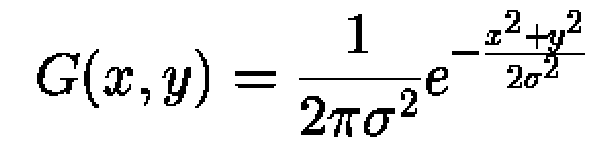

This distribution is:

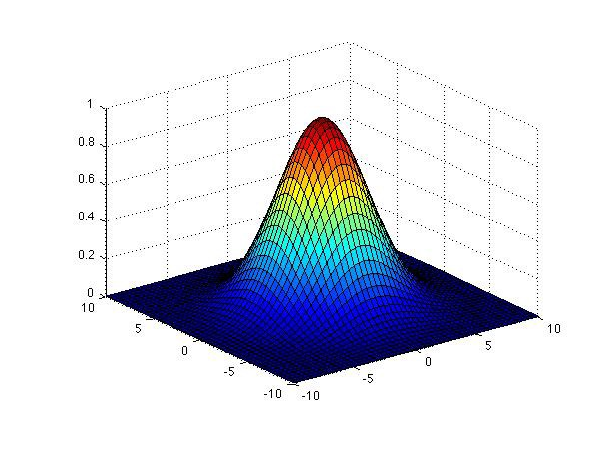

The idea of Gaussian smoothing is to use this 2-D distribution as a *point-spread* function, and this is achieved by convolution. Since the image is stored as a collection of discrete pixels we need to produce a discrete approximation to the Gaussian function before we can perform the convolution. In theory, the Gaussian distribution is non-zero everywhere, which would require an infinitely large convolution kernel, but in practice it is effectively zero more than about three standard deviations from the mean, and so we can truncate the kernel at this point. Below figure shows a suitable integer-valued convolution kernel that approximates a Gaussian with a Eqn:eqnsigma of 1.0. It is not obvious how to pick the values of the mask to approximate a Gaussian. One could use the value of the Gaussian at the centre of a pixel in the mask, but this is not accurate because the value of the Gaussian varies non-linearly across the pixel. We integrated the value of the Gaussian over the whole pixel. The integrals are not integers: we rescaled the array so that the corners had the value 1. Finally, the 273 is the sum of all the values in the mask.

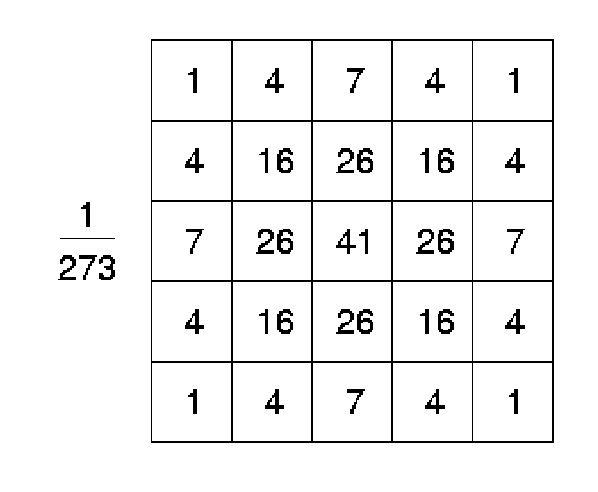

Let's visualize the **Gaussian Kernel**


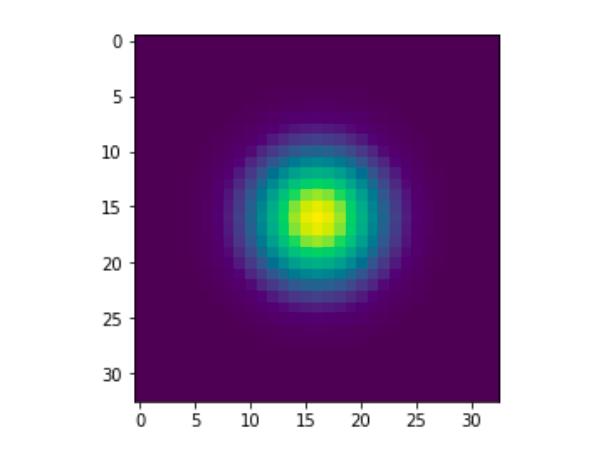

# Importing the library

In [27]:
#Opencv - Python Library for Image processing
import cv2

# Loading Image

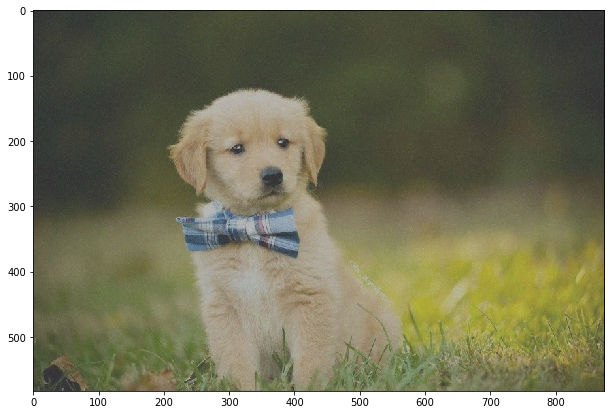

In [28]:
image = cv2.imread('image/dog.jpeg')
plt.figure(figsize=(20, 7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Adding Noise to the image

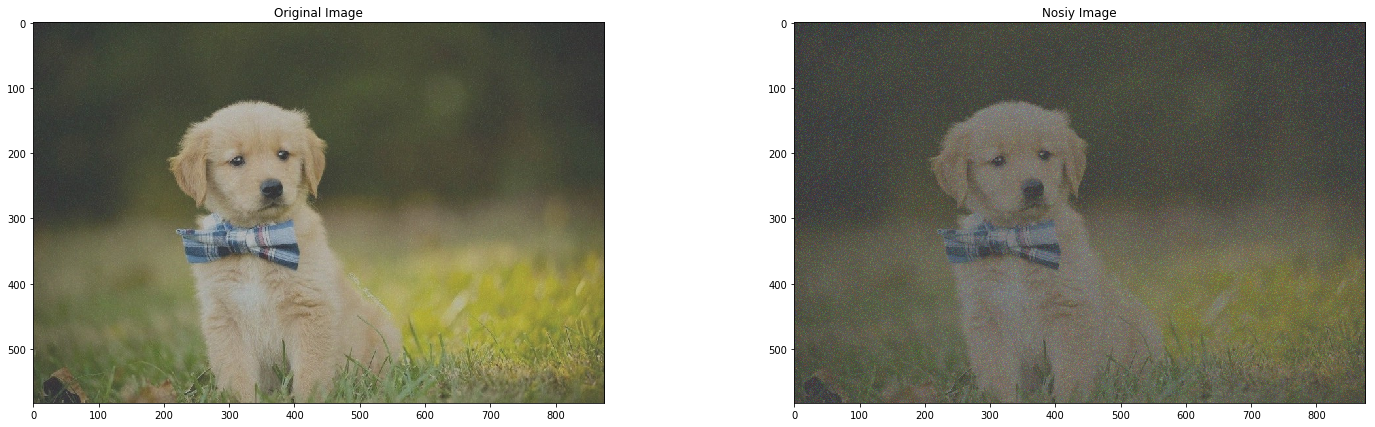

In [29]:
def addNoise(img):
    dst = np.empty_like(img)
    noise = cv2.randn(dst, (0,0,0), (30,30,30))
    pup_noise = cv2.addWeighted(img, 0.5, noise, 0.5, 30)

    return pup_noise

#Adding Noise to Image
noisy_image = addNoise(image)

#Plotting the Original & Noisy image
plt.figure(figsize=(25, 7))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('Nosiy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.show()

# Applying Gaussian Kernel to remove the noise from the image
In essence, the **Gaussian blurring** algorithm will scan over each pixel of the image, and recalculate the pixel value based on the pixel values that surround it. The area that is scanned around each pixel is called the kernel. A larger kernel scans a larger amount of pixels that surround the center pixel.

Gaussian blurring doesn’t weigh each pixel equally, however. The closer a pixel is to the center, the greater it affects the weighted average used to calculate the new center pixel value. The image below demonstrates this function. This method assumes pixels closest to the center pixel will be closest to the true value of that pixel, so they will influence the averaged value of the center pixel greater than pixels further away.

The size of the sigma of the function dictates how wide the curve should be inside the kernel, in the same way that that sigma, or standard deviation, of a Normal Distribution curve will dictate the width of the curve. Since we are essentially operating in 3-D space here, the sigma here works both in the X and Y directions, so sigma-X and sigma-Y may have different values.

The **openCV** **GaussianBlur()** function takes in **3** parameters here: **the original image**, **the kernel size**, and **the sigma** for X and Y. The kernel is the matrix that the algorithm uses to scan over the image, and in this case the kernel is **9x9**, where the center pixel is the pixel that will be changed with respect to the surrounding 24. The sigma dictates the width of the curve in the X and Y directions. If one value is provided to the function, it will serve as sigma for both X and Y, but separate values may be passed as well (resulting in 4 arguments). It is also important to note that if the sigma is 0, it will be auto-calculated from the kernel size.

# Applying Gaussian De-Noising to the Image

In [30]:
denoised_image = cv2.GaussianBlur(noisy_image, (9, 9), 0)

## Let's Have a look at the denoised image

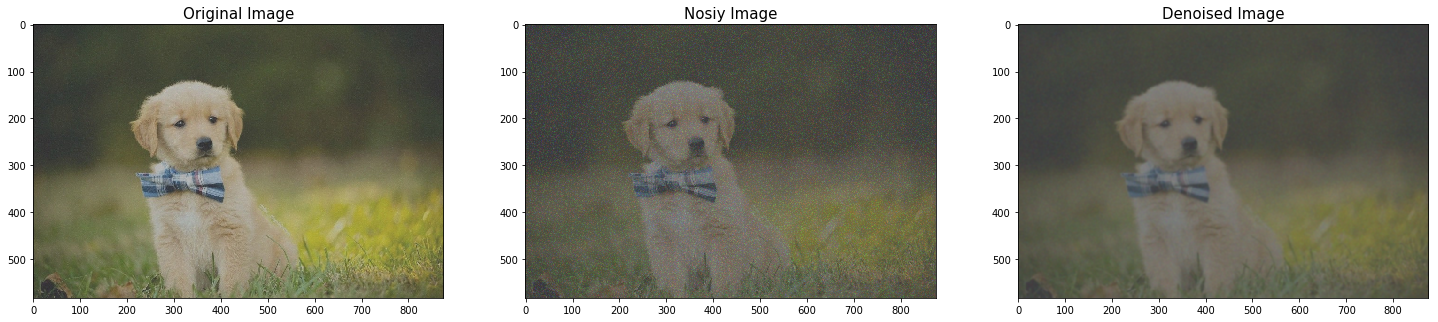

In [31]:
#Plotting Orignal, Noisy & Denoised Image
plt.figure(figsize=(25, 7))
plt.subplot(131)
plt.title('Original Image', fontsize=15)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.title('Nosiy Image', fontsize=15)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.title('Denoised Image', fontsize=15)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.show()

# Blurring by Gaussian Kernel

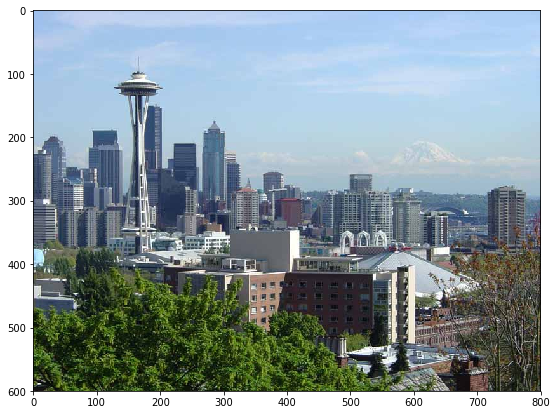

In [32]:
#Loading the image
plt.figure(figsize=(20, 7))
building_image = cv2.imread('image/building.jpeg')
plt.imshow(cv2.cvtColor(building_image, cv2.COLOR_BGR2RGB))
plt.show()

# Applying the Gaussian Blur to the image

In [33]:
def GaussianBlurImage(image, kernel_size, sigma):
    img = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return img

#Applying Gaussian Blur to Image
blurred_image = GaussianBlurImage(building_image, 41, 10)

# Let's have a look at the image

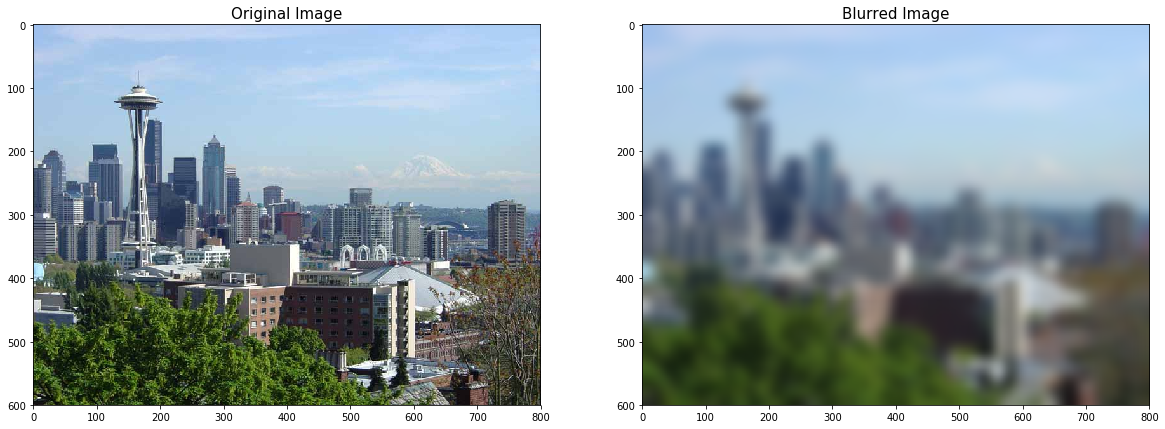

In [34]:
#Plotting the Original & Blurred Image
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title('Original Image', fontsize=15)
plt.imshow(cv2.cvtColor(building_image, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('Blurred Image', fontsize=15)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()

# Conclusion
We have seen the application of **Gaussian Kernel** in removing noise from the image as well as how to **blur** the image. **Gaussian Kernel** is very simple to use & easy to understand.

# Use Case 3

Now, I am demonstrating the third use case which is the application of **Probability** in **Data Science** for balancing the data. Data science is the field of study that combines domain expertise, programming skills, and knowledge of mathematics(especially **Probability** & **Statistics**) to extract meaningful insights from data. In Data Science the most important thing is Data. If there is no data then there is no science of it. But if we see the real-world data it is highly imbalanced. For applying Data Science & Machine Learning robustly, we need balanced data so that we can unbiasedly train the ML models and give unbiased results. Since we have imbalanced data we have to balance it somehow. One way to balance the data is to use the Weighted Loss function. In Data Science & Machine Learning, a **loss function or cost function** is a function that maps an event or values of one or more variables onto a real number intuitively representing some *cost* associated with the event. An optimization problem seeks to minimize a loss function. The loss function which is used for this purpose is the **Log-normal** loss function. The log-normal function is a **continuous probability distribution** of a random variable whose logarithm is normally distributed. Thus, if the random variable **X** is log-normally distributed, then **Y = ln(X)** has a normal distribution. Equivalently, if Y has a normal distribution, then the exponential function of **Y**, **X = exp(Y)**, has a log-normal distribution. A random variable which is log-normally distributed takes only positive real values. For calculating the loss a different form of Log-normal loss function is used which is called **Cross-Entropy/Negative Log-Likelihood** loss function.

We know that in real-world especially in Medical field there is a high imbalance in the dataset. As we know that most of the people are physically fit only a few have diseases it is very difficult to have the medical data in a large amount. Always the data having a label as normal is more as compared to abnormal in Medical data. So it is very important to know how to deal with such situations. In further conversation, we will discuss how to deal with it.

# Creating the ground truth labels

In [35]:
y_true = np.array(
    [[1],
     [1],
     [1],
     [0]])
print(f"y_true: \n{y_true}")

y_true: 
[[1]
 [1]
 [1]
 [0]]


# Two models
To better understand the loss function, we will pretend that we have two models.

 - Model 1 always outputs a 0.9 for any example that it's given.
 - Model 2 always outputs a 0.1 for any example that it's given

In [36]:
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(f"y_pred_1: \n{y_pred_1}")
print()
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(f"y_pred_2: \n{y_pred_2}")

y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]

y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


# Let's calculate the loss for both the models using Cross Entropy Loss function

In [37]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_reg_1: {loss_reg_1:.4f}")

loss_reg_1: 2.6187


In [38]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.4f}")

loss_reg_2: 7.0131


In [39]:
print(f"When the model 1 always predicts 0.9, the regular loss is {loss_reg_1:.4f}")
print(f"When the model 2 always predicts 0.1, the regular loss is {loss_reg_2:.4f}")

When the model 1 always predicts 0.9, the regular loss is 2.6187
When the model 2 always predicts 0.1, the regular loss is 7.0131


Notice that the loss function gives a greater loss when the predictions are always 0.1, because the data is imbalanced, and has three labels of 1 but only one label for 0.

Given a class imbalance with more positive labels, the regular loss function implies that the model with the higher prediction of 0.9 performs better than the model with the lower prediction of 0.1 Which is not the case as both models are equally bad.

## How a weighted loss treats both models the same
With a weighted loss function, we will get the same weighted loss when the predictions are all 0.9 versus when the predictions are all 0.1.

 - Notice how a prediction of 0.9 is 0.1 away from the positive label of 1.
 - Also notice how a prediction of 0.1 is 0.1 away from the negative label of 0.
 - So model 1 and 2 are symmetric along the midpoint of 0.5, if we plot them on a number line between 0 and 1.

## Weighted Loss Equation
Calculate the loss for the zeroth label

The loss is made up of two terms. To make it easier to read the code, we will calculate each of these terms separately. We are giving each of these two terms a name for explanatory purposes, but these are not officially called *losspos* or *lossneg*.

 - losspos: we'll use this to refer to the loss where the actual label is positive (the positive examples).
 - lossneg: we'll use this to refer to the loss where the actual label is negative (the negative examples).

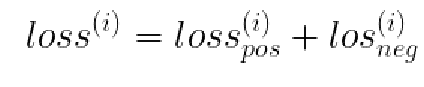

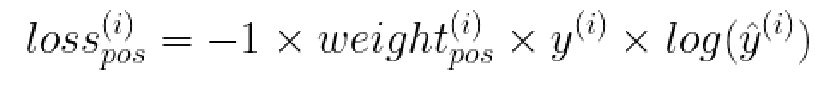

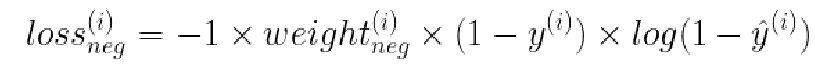

Since this sample dataset is small enough, we can calculate the positive weight to be used in the weighted loss function. To get a positive weight, count how many NEGATIVE labels are present, divided by the total number of examples.

In this case, there is one negative label and four total examples. Similarly, the negative weight is the fraction of positive labels.

## Defining positive and negative weights

####  Calculating the positive weight as the fraction of negative labels & negative weight as the fraction of positive labels

In [41]:
w_p = 1/4
w_n= 3/4

print(f"positive weight w_p: {w_p}")
print(f"negative weight w_n {w_n}")

positive weight w_p: 0.25
negative weight w_n 0.75


## Model 1 weighted loss

In [42]:
#Calculating and printing out the first term in the loss function, which we are calling 'loss_pos'
loss_1_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_1 ))
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.0790


In [43]:
#Calculating and printing out the second term in the loss function, which we're calling 'loss_neg'
loss_1_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_1 ))
print(f"loss_1_neg: {loss_1_neg:.4f}")

#Sum positive and negative losses to calculate total loss
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1: {loss_1:.4f}")

loss_1_neg: 1.7269
loss_1: 1.8060


## Model 2 weighted loss

In [44]:
#Calculating and printing out the first term in the loss function, which we are calling 'loss_pos'
loss_2_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_2))
print(f"loss_2_pos: {loss_2_pos:.4f}")

#Calculating and printing out the second term in the loss function, which we're calling 'loss_neg'
loss_2_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_2_neg: {loss_2_neg:.4f}")

loss_2_pos: 1.7269
loss_2_neg: 0.0790


In [45]:
loss_2 = loss_2_pos + loss_2_neg
print(f"loss_2: {loss_2:.4f}")

loss_2: 1.8060


## Comparing model 1 and model 2 weighted loss

In [46]:
print(f"When the model always predicts 0.9, the total loss is {loss_1:.4f}")
print(f"When the model always predicts 0.1, the total loss is {loss_2:.4f}")

When the model always predicts 0.9, the total loss is 1.8060
When the model always predicts 0.1, the total loss is 1.8060


## What do we notice?
Since we used a weighted loss, the calculated loss is the same whether the model always predicts 0.9 or always predicts 0.1.

we may have also noticed that when we calculate each term of the weighted loss separately, there is a bit of symmetry when comparing between the two sets of predictions.

In [47]:
print(f"loss_1_pos: {loss_1_pos:.4f} \t loss_1_neg: {loss_1_neg:.4f}")
print()
print(f"loss_2_pos: {loss_2_pos:.4f} \t loss_2_neg: {loss_2_neg:.4f}")

loss_1_pos: 0.0790 	 loss_1_neg: 1.7269

loss_2_pos: 1.7269 	 loss_2_neg: 0.0790


# Conclusion
Even though there is a class imbalance, where there are 3 positive labels but only one negative label, the weighted loss accounts for this by giving more weight to the negative label than to the positive label.

The data as well as the predictions were chosen so that we end up getting the same weighted loss for both categories.

In general, we will expect to calculate different weighted loss values for each disease category, as the model predictions and data will differ from one category to another.

# Thank you !!!